In [5]:
import pandas as pd
import numpy as np
import gzip
import re
%matplotlib inline

In [3]:
lodes_zip  = 'D:\working_folder\lodes\ga_od_main_JT00_2014.csv.gz'
xwalk_zip = 'D:\working_folder\lodes\ga_xwalk.csv.gz'
gtri = 131210010012005
lodes = pd.read_csv(lodes_zip,compression='gzip')
xwalk = pd.read_csv(xwalk_zip,compression='gzip')
gtri_work = lodes[lodes.w_geocode == gtri]

C:\Users\ss276\AppData\Local\Continuum\Anaconda3\envs\Py3.5\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (27,28,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\ss276\AppData\Local\Continuum\Anaconda3\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ss276\AppData\Local\Continuum\Anaconda3\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ss276\AppData\Local\Continuum\Anaconda3\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



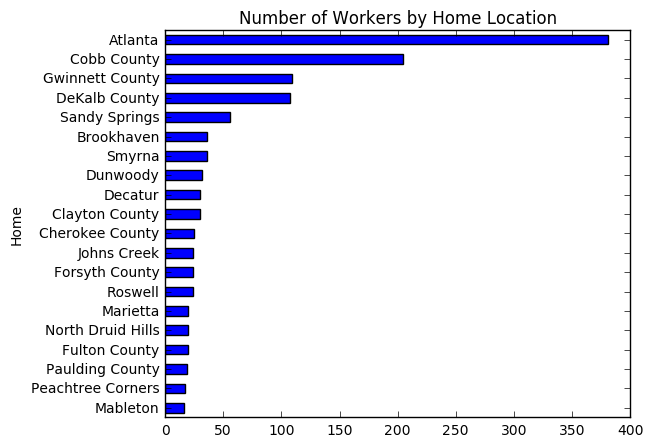

In [6]:
county_mapper = pd.Series(xwalk.ctyname.values,index=xwalk.tabblk2010).to_dict()
trct_mapper = pd.Series(xwalk.trctname.values,index=xwalk.tabblk2010).to_dict()
place_mapper = pd.Series(xwalk.stplcname.values,index=xwalk.tabblk2010).to_dict()
gtri_work['County'] = gtri_work['h_geocode'].map(county_mapper)
gtri_work['Tract'] = gtri_work['h_geocode'].map(trct_mapper)
gtri_work['Place'] = gtri_work['h_geocode'].map(place_mapper)
gtri_work['Tract'] = gtri_work['Tract'].map(lambda x: re.search(r'(\((.*)\))',x).group(2))
gtri_work.fillna(0,inplace=True)
home = []
for i,row in gtri_work.iterrows():
    if row['Place'] != 0:
        s = row['Place']
    else:
        s = row['County']
    s = s.replace(', GA','')
    s = s.replace(' city','')
    s = s.replace(' CDP','')
    home.append(s)
gtri_work['Home'] = home
grouped = gtri_work.groupby('Home')
workers = grouped['S000'].aggregate(np.sum)
workers[workers>=3].sort_values(ascending=True).tail(20).plot.barh(figsize=(6,5),
                                                                   title="Number of Workers by Home Location")